<div class="markdown-google-sans">
  <h1>Colab 시작 페이지</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;신규&#41; Gemini API를 사용해 보세요</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Colab에 이미 익숙하다면 이 동영상을 통해 양방향 테이블, 코드 실행 기록 보기, 명령어 팔레트에 관해 알아보세요.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  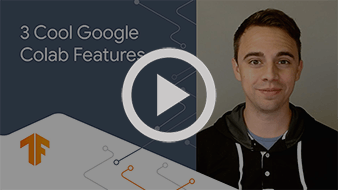
  </a>
</center>

Google Drive 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

In [ ]:
pip install dart-fss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.7/145.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 2.4.0
    Uninstalling termcolor-2.4.0:
      Successfully uninstalled termcolor-2.4.0


In [ ]:
import dart_fss as dart_fss
import pandas as pd
import requests as rq

api_key = '7fb2044ce8063944febcbc64d3b6e2c208d830da'
dart_fss.set_api_key(api_key=api_key)

corp_list = dart_fss.get_corp_list()

corp_list.corps
all = dart_fss.api.filings.get_corp_code()
all[0]

df = pd.DataFrame(all)

df_listed = df[df['stock_code'].notnull()]
df_non_listed = df[df['stock_code'].isnull()]

api_key = dart.get_api_key()

년도 변경 부탁드립니다.

# 240620 임직원 수정본

In [ ]:
new_df = pd.DateFrame()

In [ ]:
from tqdm import tqdm

new_df = pd.DataFrame(data=None)

for i in tqdm(range(0,3736)):
  code=df_listed['corp_code'].iloc[i]
  url=f'https://opendart.fss.or.kr/api/exctvSttus.json?crtfc_key=7fb2044ce8063944febcbc64d3b6e2c208d830da&corp_code={code}&bsns_year=2019&reprt_code=11011'
  try:
    data = rq.get(url)
    df=data.json().get('list')
    df=pd.DataFrame(df)
    of_count = df['ofcps'].value_counts().get('사외이사', 0)
    sex_count = df['sexdstn'].value_counts().get('여', 0)
    corp_name_first=df['corp_name'].iloc[0]
    new_data = {
        'sex_count': [sex_count],
        'first_corp_name': [corp_name_first]
    }
    new_df_for = pd.DataFrame(new_data)
    new_df = pd.concat([new_df, new_df_for], axis=0)
  except:
    pass

 48%|████▊     | 1791/3736 [44:11<46:44,  1.44s/it]

In [ ]:
new_df.to_csv('2019_임원 데이터.csv')

# 직원 데이터 가져오기

In [ ]:
# 직원 데이터

from tqdm import tqdm
new_df = pd.DataFrame(data=None)

for i in tqdm(range(0,3731)):
  code=df_listed['corp_code'].iloc[i]
  url=f'https://opendart.fss.or.kr/api/empSttus.json?crtfc_key=f791957a1999edb202dbb0447e617f0e6841a370&corp_code={code}&bsns_year=2019&reprt_code=11011'

  try:
    data = rq.get(url)
    df=data.json().get('list')
    df=pd.DataFrame(df)
    new_df = pd.concat([new_df, df], axis=0)

  except:
    pass

In [ ]:
new_df.to_csv('2019_직원 데이터.csv')